In [99]:
import pandas as pd
import numpy as np

In [100]:
dataset=pd.read_csv(r'C:\Users\proto\Downloads\Data Science, Machine Learning, Data Analytics\ML and AI\Deep Learning\dile\Day 04\Day 04 -Tutorial\data\cardio_dataset.csv').values

In [101]:
data=dataset[:,0:7]
target=dataset[:,7]

In [102]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [103]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

In [104]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(256, input_dim=7, activation='sigmoid',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               2048      
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 25)                3225      
                                                                 
 dense_31 (Dense)            (None, 1)                 26        
                                                                 
Total params: 38,195
Trainable params: 38,195
Non-trai

In [105]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self,epoch,logs=None):
        predicted_result=model.predict(test_data)
        r2=r2_score(test_target,predicted_result)
        print('epoch ',epoch,'- r2 score:',r2)

In [106]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')

In [107]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
42/42 [==============================] - 0s 683us/step
epoch  0 - r2 score: -0.2938027217337671
167/167 [==============================] - 1s 6ms/step - loss: 0.0909 - mse: 0.0909 - mae: 0.2057 - val_loss: 0.0311 - val_mse: 0.0311 - val_mae: 0.1528
Epoch 2/200
42/42 [==============================] - 0s 659us/step
epoch  1 - r2 score: -0.013366874918733673
167/167 [==============================] - 1s 4ms/step - loss: 0.0320 - mse: 0.0320 - mae: 0.1372 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1272
Epoch 3/200
42/42 [==============================] - 0s 463us/step
epoch  2 - r2 score: 0.06732130873435571
167/167 [==============================] - 1s 5ms/step - loss: 0.0285 - mse: 0.0285 - mae: 0.1300 - val_loss: 0.0224 - val_mse: 0.0224 - val_mae: 0.1157
Epoch 4/200
42/42 [==============================] - 0s 463us/steposs: 0.0246 - mse: 0.0246 - mae: 0.11
epoch  3 - r2 score: 0.020565665687119927
167/167 [==============================] - 0s 2ms/step - loss: 0.0246

Epoch 22/200
42/42 [==============================] - 0s 447us/step
epoch  21 - r2 score: 0.8391041928522265
167/167 [==============================] - 1s 5ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0556 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0384
Epoch 23/200
42/42 [==============================] - 0s 537us/step
epoch  22 - r2 score: 0.8415039575883477
167/167 [==============================] - 1s 5ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0533 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0387
Epoch 24/200
42/42 [==============================] - 0s 463us/steposs: 0.0062 - mse: 0.0062 - mae: 0.05
epoch  23 - r2 score: 0.8318685156733767
167/167 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0546 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0385
Epoch 25/200
42/42 [==============================] - 0s 512us/steposs: 0.0063 - mse: 0.0063 - mae: 0.05
epoch  24 - r2 score: 0.8190703361258468
167/167 [======================

42/42 [==============================] - 0s 452us/step
epoch  45 - r2 score: 0.8505376070531638
167/167 [==============================] - 1s 5ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0463 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0388
Epoch 47/200
42/42 [==============================] - 0s 439us/step
epoch  46 - r2 score: 0.8514777460460039
167/167 [==============================] - 1s 6ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0465 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0368
Epoch 48/200
42/42 [==============================] - 0s 439us/steposs: 0.0049 - mse: 0.0049 - mae: 0.04
epoch  47 - r2 score: 0.8482838310387464
167/167 [==============================] - 0s 2ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0455 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0366
Epoch 49/200
42/42 [==============================] - 0s 439us/steposs: 0.0049 - mse: 0.0049 - mae: 0.04
epoch  48 - r2 score: 0.849416527228106
167/167 [==============================] - 0s

Epoch 73/200
42/42 [==============================] - 0s 390us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  72 - r2 score: 0.8561663069430144
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0418 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0388
Epoch 74/200
42/42 [==============================] - 0s 439us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  73 - r2 score: 0.851749944045676
167/167 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0428 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0414
Epoch 75/200
42/42 [==============================] - 0s 463us/steposs: 0.0044 - mse: 0.0044 - mae: 0.04
epoch  74 - r2 score: 0.8578694613079887
167/167 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0427 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0351
Epoch 76/200
42/42 [==============================] - 0s 414us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04

42/42 [==============================] - 0s 463us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  98 - r2 score: 0.8542364453807969
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0403 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0391
Epoch 100/200
42/42 [==============================] - 0s 488us/steposs: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  99 - r2 score: 0.8537362950703581
167/167 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0422 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0351
Epoch 101/200
42/42 [==============================] - 0s 463us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  100 - r2 score: 0.8332603288735612
167/167 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0411 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0391
Epoch 102/200
42/42 [==============================] - 0s 537us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch  

42/42 [==============================] - 0s 439us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  124 - r2 score: 0.8606683201678315
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0396 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0350
Epoch 126/200
42/42 [==============================] - 0s 439us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch  125 - r2 score: 0.8617212321436722
167/167 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0410 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0345
Epoch 127/200
42/42 [==============================] - 0s 585us/steposs: 0.0039 - mse: 0.0039 - mae: 0.0396   
epoch  126 - r2 score: 0.8547014652576778
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0398 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0404
Epoch 128/200
42/42 [==============================] - 0s 415us/steposs: 0.0039 - mse: 0.0039 - mae: 0.03


42/42 [==============================] - 0s 415us/steposs: 0.0039 - mse: 0.0039 - mae: 0.03
epoch  150 - r2 score: 0.8514386980116916
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0393 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0353
Epoch 152/200
42/42 [==============================] - 0s 439us/steposs: 0.0039 - mse: 0.0039 - mae: 0.03
epoch  151 - r2 score: 0.8600850708671026
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0397 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0386
Epoch 153/200
42/42 [==============================] - 0s 463us/steposs: 0.0039 - mse: 0.0039 - mae: 0.04
epoch  152 - r2 score: 0.8645085645717795
167/167 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0397 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0363
Epoch 154/200
42/42 [==============================] - 0s 439us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch

42/42 [==============================] - 0s 463us/step
epoch  176 - r2 score: 0.8683147357250263
167/167 [==============================] - 1s 4ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0390 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0343
Epoch 178/200
42/42 [==============================] - 0s 538us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch  177 - r2 score: 0.867779204145328
167/167 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0384 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0341
Epoch 179/200
42/42 [==============================] - 0s 439us/steposs: 0.0037 - mse: 0.0037 - mae: 0.03
epoch  178 - r2 score: 0.8556232634251791
167/167 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0385 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0416
Epoch 180/200
42/42 [==============================] - 0s 585us/step
epoch  179 - r2 score: 0.8687020811536643
167/167 [=============================

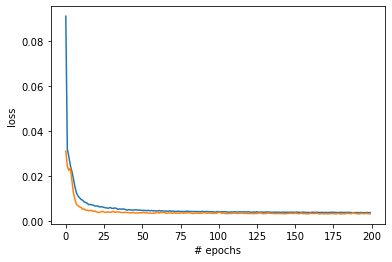

In [108]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [109]:
predicted_result=model.predict(test_data)

42/42 [==============================] - 0s 710us/step


In [110]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.41383353 0.43728019 0.07620164 0.42907386 0.25205158 0.3950762
  0.20046893 0.01875733 0.01524033 0.00234467]]
predicted: [[0.3896781  0.4077225  0.07861595 0.41551924 0.2612085  0.4153993
  0.22555214 0.0197837  0.02335345 0.0111452 ]]


In [111]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[35.4 37.4  6.6 36.7 21.6 33.8 17.2  1.7  1.4  0.3]]
predicted inverse scaled: [[33.339542  34.87873    6.8059406 35.543793  22.381086  35.53356
  19.339598   1.7875495  2.0920494  1.0506853]]


# Save all the models

In [112]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']